# PCA Scikit Learn

In [1]:
from sklearn.datasets import load_iris

dataset = load_iris()
X = dataset.data
y = dataset.target

In [2]:
# Exercise from dataset.data, which is a numpy array
#      Create a pandas DataFrame with dataset['feature_names'] as column names

# Then use sns.pairplot on the newly created Dataframe

In [3]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [6]:
sum(sklearn_pca.explained_variance_ratio_)

1.0

In [76]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [77]:
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [78]:
Y_sklearn[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

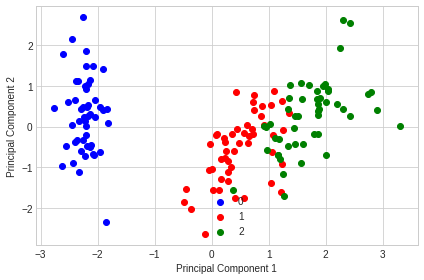

In [79]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [80]:
from sklearn.decomposition import PCA

# PCA of one feature.
# Here we are explaining the original data which had 4 features, with only one
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.72962445])

In [81]:
# As we know, numpy.ndarray can cause problem when they only have one dimension
# We reshape this vector to be a matrix

y_ = y.reshape((-1, 1))

In [82]:
import numpy as np

# We wish to concatenate our 2 matrices in one,
# so we can easily plot them with seaborn
pca_of_one_elem = np.concatenate((Y_sklearn, y_), axis=1)

In [83]:
import pandas as pd

# Here we are converting a numpy array to a pandas DataFrame
df_pca = pd.DataFrame(data=pca_of_one_elem, columns=["PCA_Feat_1", "Target"])

<AxesSubplot:xlabel='PCA_Feat_1', ylabel='Count'>

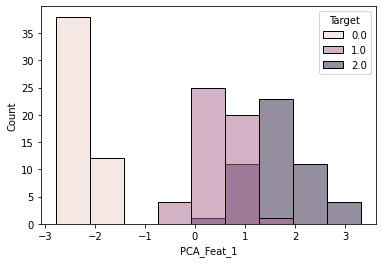

In [84]:
import seaborn as sns

# Plotting the Histogram
sns.histplot(data=df_pca, x="PCA_Feat_1", hue="Target")

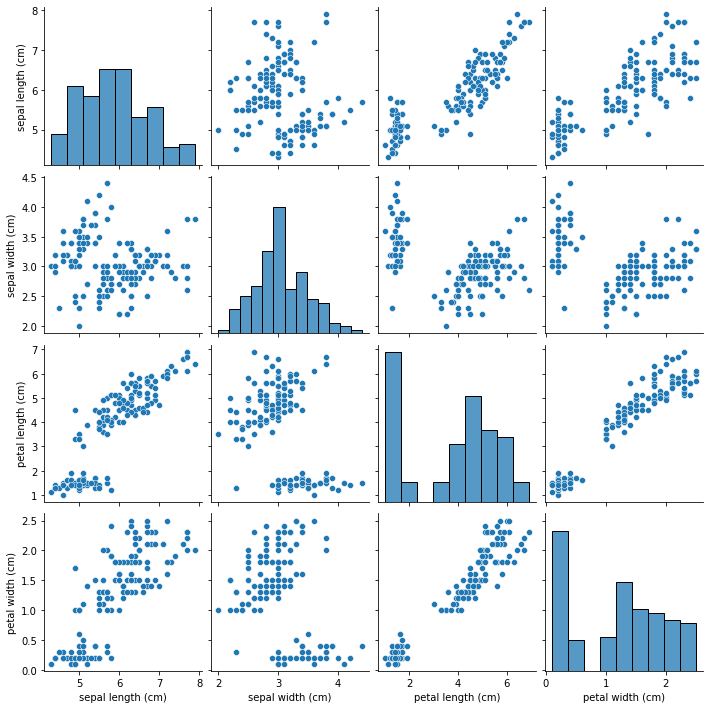

In [85]:
# Create a pandas DataFrame with dataset['feature_names'] as column names
df_original_data = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
# Then use sns.pairplot on the newly created Dataframe
sns.pairplot(data=df_original_data)

In [86]:
dataset['target'][:5]

array([0, 0, 0, 0, 0])

In [87]:
dataset['target'].reshape((-1, 1))[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [88]:
dataset['data'].shape

(150, 4)

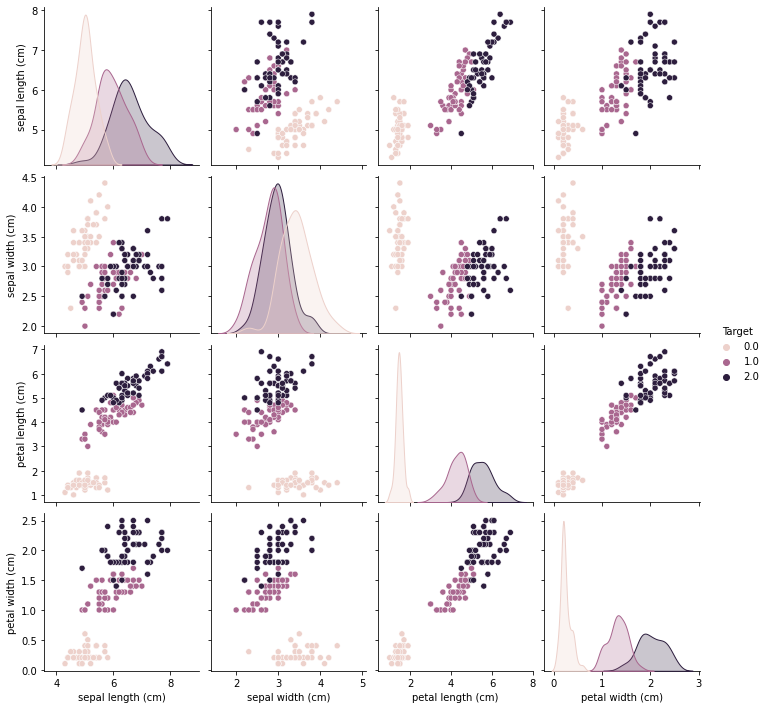

In [89]:
from copy import deepcopy

# Reshape target to be a matrix
y_ = dataset['target'].reshape((-1, 1))
# Concatenate X with new target (which now is a matrix)
full_data = np.concatenate((dataset['data'], y_), axis=1)
# Creating an arraw with the features names AND the target name
New_names = deepcopy(dataset['feature_names'])
New_names.append('Target')
# Convert to pandas dataframe
df_original_data = pd.DataFrame(data=full_data, columns=New_names)
# Plotting Pairplot
sns.pairplot(data=df_original_data, hue='Target')

In [90]:
# raise ValueError(" Error")

# Some Dimention Reduction Techniques

A short notebook in which i tried to cover some Linear as well as Non- Linear Dimension Reduction techniques.

 - **Linear**
     1. Principal component analysis 
     2. Incremental PCA
     3. SVD (single value decomposition)
     4. Sparse PCA
     5. Random projection
         - (a)-> Gaussian Random Projection
         - (b)-> Sparse Random Projection
 - **Non Linear** (Manifold)
     1. kernel PCA
     2. Isomap
     3. t-SNE
     4. Multi dimension Scaling
     5. Independent Principal Component

## **Linear**

In [91]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
print(os.listdir("fashion"))

['fashion-mnist_train.csv', 'train-labels-idx1-ubyte', 't10k-images-idx3-ubyte', 'train-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_test.csv']


DATASET: https://www.kaggle.com/zalando-research/fashionmnist

Context:

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.

Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

It shares the same image size and structure of training and testing splits.

In [92]:
train=pd.read_csv("./fashion/fashion-mnist_train.csv")

In [93]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
train.shape

(60000, 785)

In [95]:
train_label=train['label']
del train['label']

Choosing only some portion of data so that dimension reduction algorithms execute fast

In [96]:
# Batch data
train=train.iloc[0:1000,:]
train_label=train_label.iloc[0:1000]

Helper function below which we will use to plot figures. 

Will use to Plotting 1st and 2nd Principal component

In [97]:
# helper function for plotting
def plotting(xdf,ydf,title):
    xdf=pd.DataFrame(data=xdf, index=train.index)
    xdf=xdf.iloc[:,0:2]
    data=pd.concat((xdf,ydf),axis=1)
    data=data.rename(columns={0:'first',1:'second'})
    sns.lmplot(data=data,x='first',y='second',hue='label',fit_reg=False)
    sns.set_style('darkgrid')
    plt.title(title)

### PCA: 

It will try to an axis to retain maximum variance. Newly derived axis called Principal component (PC1). Now next principal component will be orthogonal to all previous one

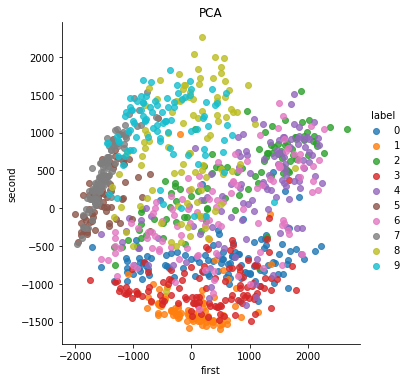

In [98]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=132,whiten=False)
train_pca=pca.fit_transform(train)
plotting(train_pca,train_label,'PCA')

### Incremental PCA

Sometimes it's hard to load full data to perform dimension reduction. We divide data into batches then apply Incremetal PCA one by one

In [110]:
60_000 / 100

600.0

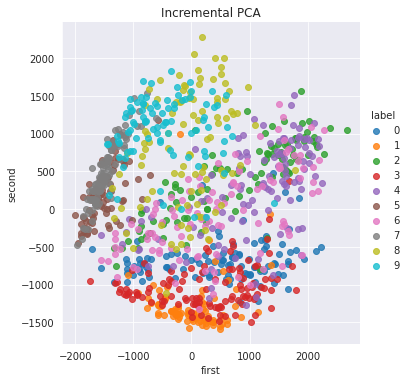

In [99]:
from sklearn.decomposition import IncrementalPCA
ipca=IncrementalPCA(n_components=3)
batch_size=100
for train_batch in np.array_split(train,batch_size):
    ipca.partial_fit(train_batch)
plotting(ipca.transform(train),train_label,'Incremental PCA')

### Sparse PCA:
Sparse PCA retain some degree of sparsity controlled by hyper parameter aplha. It is slow to train

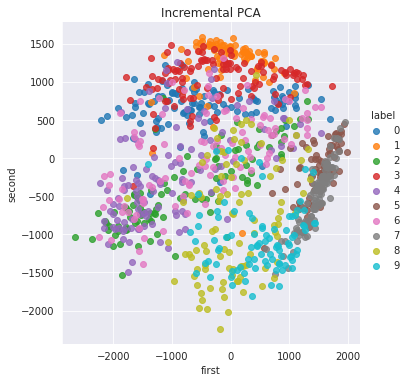

In [100]:
from sklearn.decomposition import SparsePCA
sparse_pca=SparsePCA(n_components=2,alpha=0.002)
plotting(sparse_pca.fit_transform(train),train_label,'Incremental PCA')

## **Non-Linear (Manifold)**

### Kernel PCA:

Mainly use when original dataset is not lineraly seperable. Then Kernel use to plot on kernel space then dimension reduction applied on top of it

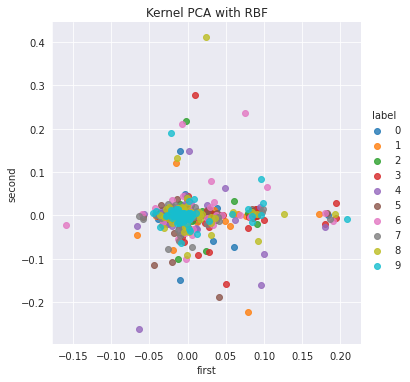

In [101]:
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=2, kernel='rbf')
plotting(kpca.fit_transform(train),train_label,'Kernel PCA with RBF')

### SVD (Single value Decomposition):

Way in which original data dimension reduced and further we can get original data again with some combination of smaller rank matrix

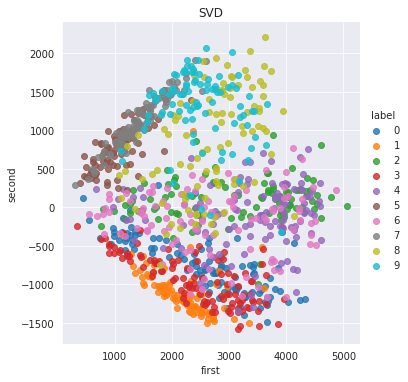

In [102]:
from sklearn.decomposition import TruncatedSVD
tsvd=TruncatedSVD(n_components=2, n_iter=5, algorithm='randomized')
plotting(tsvd.fit_transform(train),train_label,'SVD')

### Random Projection :

#### Gaussian Projection : 

In this projection we don't need to specify number of principal components. It can be controlled by hyper parameter eps

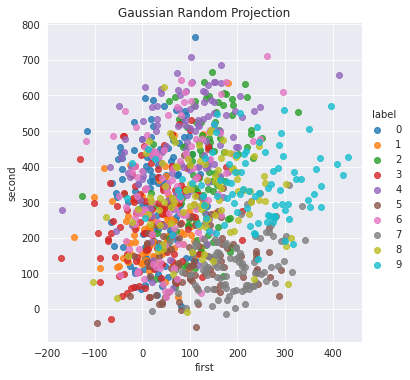

In [103]:
from sklearn.random_projection import GaussianRandomProjection
grp=GaussianRandomProjection(n_components='auto', eps=0.5)
plotting(grp.fit_transform(train),train_label,'Gaussian Random Projection')

#### Sparse Projection :

Same as Gaussian proejction with retain some sparse space from dataset. number of principal components can be controlled parameter eps. If eps high PC low and eps low PC high

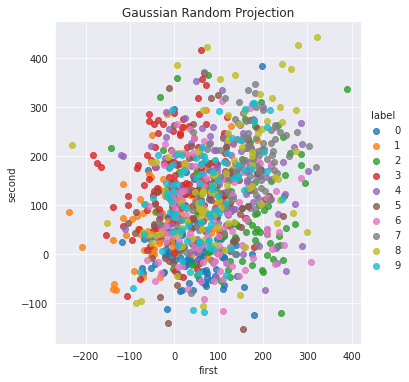

In [104]:
from sklearn.random_projection import SparseRandomProjection
srp=SparseRandomProjection(n_components='auto', eps=0.5, dense_output=False)
plotting(srp.fit_transform(train),train_label,'Gaussian Random Projection')

### Isomap:

Calculate pairwise distance between all points where, distance is not calculated by euclidean distance.

Parameter n_neighbors use to specify neighbors to choose for pair wise distance calculation

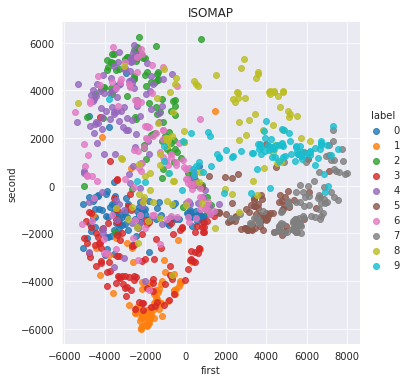

In [105]:
from sklearn.manifold import Isomap
isomap= Isomap(n_components=2, n_neighbors=10, n_jobs=-1)
plotting(isomap.fit_transform(train),train_label,'ISOMAP')

### t-SNE :

It is mainly use to reduce dimention to 2 or 3 for visualization purpose. 

It uses probablity distribution of higher order dimension and compare with lower dimension order for dimension reduction

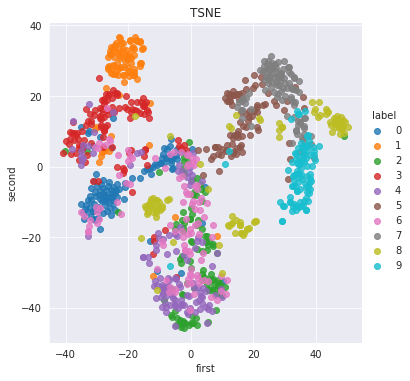

In [106]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, learning_rate=300, early_exaggeration=12, init='random')
plotting(tsne.fit_transform(train),train_label,'TSNE')

### Multi-dimensional Scaling (MDS):

It tries to understand the similarity between data points of higher dimension then use that learning to reduce dimension to lower dimenion.

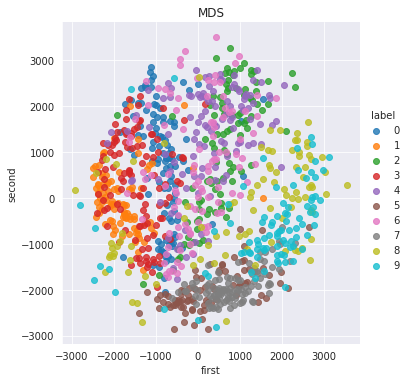

In [107]:
from sklearn.manifold import MDS 
mds=MDS(n_components=2, max_iter=100, metric=True, n_jobs=-1)
plotting(mds.fit_transform(train),train_label,'MDS')

### Independent Component Analysis(ICA):

One of the most important dimension reduction technique is ICA.

Since sometimes many signals are blended together as one feature so in order to seperate these we use ICA. 

It can also revert all signal back to one feature. mainly use in audio, video, signal processing

In [108]:
from sklearn.decomposition import FastICA

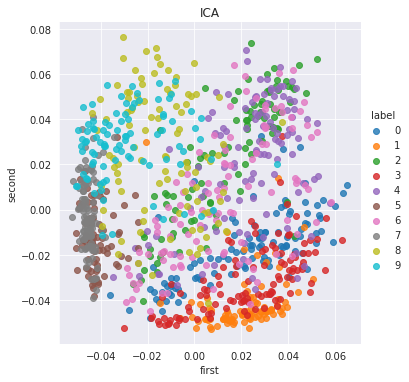

In [109]:
fast_ica=FastICA(n_components=2, max_iter=50, algorithm='parallel')
plotting(fast_ica.fit_transform(train),train_label,'ICA')